导入和配置环境

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
# 设置图例正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置黑体显示中文
plt.rcParams['axes.unicode_minus'] = False
# 解决负号"-"显示方块问题# 清空环境（Python中不需要显式清空，新的运行环境自动清空）

导入数据

In [27]:
res = pd.read_excel('D:\\文件\\Long-Term Deflection of Reinforced Concrete Beams_New.xlsx')
Num, Dim = res.shape

划分训练集和测试集

In [28]:
X = res.iloc[:, :Dim -1].values
y = res.iloc[:, Dim -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

数据归一化

In [29]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

训练模型

In [30]:
trees = 100
leaf = 5
net = RandomForestRegressor(n_estimators=trees, min_samples_leaf=leaf, oob_score=True)
net.fit(X_train_scaled, y_train_scaled)
importance = net.feature_importances_

仿真测试与反归一化

In [31]:
# 仿真测试
y_sim1_scaled = net.predict(X_train_scaled)
y_sim2_scaled = net.predict(X_test_scaled)

# 数据反归一化
y_sim1 = scaler_y.inverse_transform(y_sim1_scaled.reshape(-1, 1)).flatten()
y_sim2 = scaler_y.inverse_transform(y_sim2_scaled.reshape(-1, 1)).flatten()

均方根误差

In [32]:
M = len(y_train)
N = len(y_test)
error1 = np.sqrt(np.sum((y_sim1 - y_train) ** 2) / M)
error2 = np.sqrt(np.sum((y_sim2 - y_test) ** 2) / N)

绘图：预测结果对比

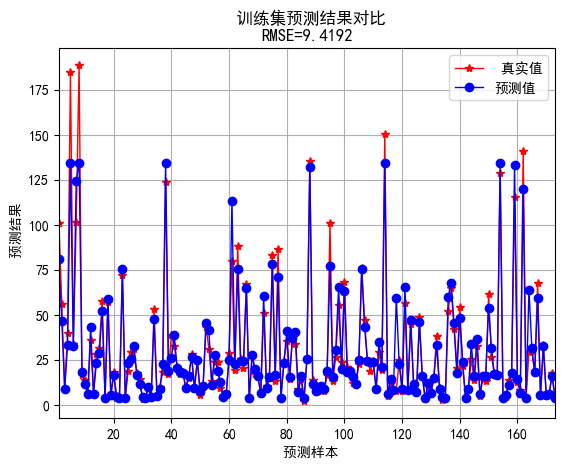

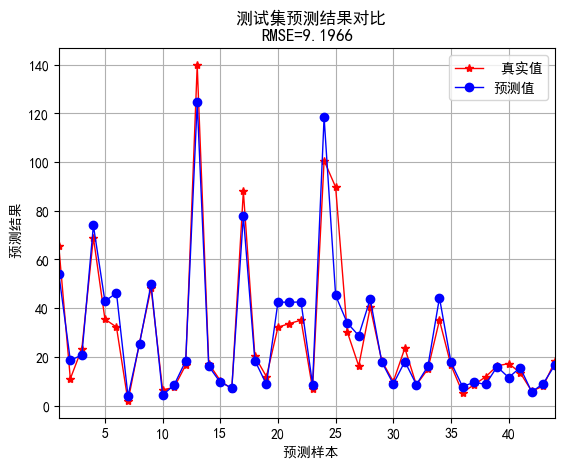

In [33]:
plt.figure()
plt.plot(range(1, M + 1), y_train,'r-*', range(1, M + 1), y_sim1,'b-o', linewidth=1)
plt.legend([' 真实值','预测值'])
plt.xlabel(' 预测样本')
plt.ylabel(' 预测结果')
plt.title(f' 训练集预测结果对比\nRMSE={error1:.4f}')
plt.xlim([1, M])
plt.grid()

plt.figure()
plt.plot(range(1, N + 1), y_test,'r-*', range(1, N + 1), y_sim2,'b-o', linewidth=1)
plt.legend([' 真实值','预测值'])
plt.xlabel(' 预测样本')
plt.ylabel(' 预测结果')
plt.title(f' 测试集预测结果对比\nRMSE={error2:.4f}')
plt.xlim([1, N])
plt.grid()

绘制误差曲线

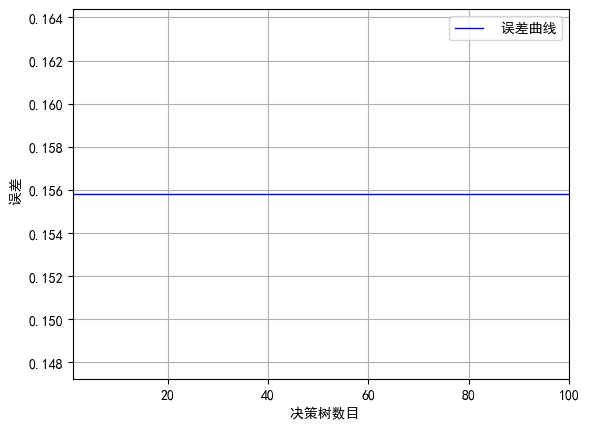

In [34]:
oob_errors = 1 - net.oob_score_
plt.figure()
plt.plot(range(1, trees + 1), [oob_errors] * trees,'b-', linewidth=1)
plt.legend([' 误差曲线'])
plt.xlabel(' 决策树数目')
plt.ylabel(' 误差')
plt.xlim([1, trees])
plt.grid()

绘制特征重要性

Text(0, 0.5, ' 重要性')

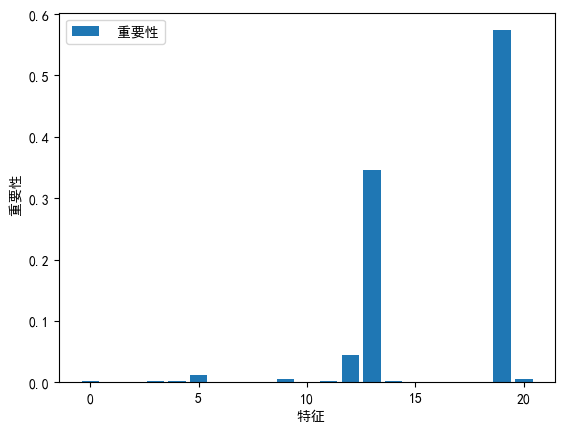

In [35]:
plt.figure()
plt.bar(range(len(importance)), importance)
plt.legend([' 重要性'])
plt.xlabel(' 特征')
plt.ylabel(' 重要性')

相关指标计算

In [36]:
#R1和R2
R1 = r2_score(y_train, y_sim1)
R2 = r2_score(y_test, y_sim2)

print(f'训练集数据的R2为：{R1:.4f}')
print(f'测试集数据的R2为：{R2:.4f}')

# MAE
mae1 = mean_absolute_error(y_train, y_sim1)
mae2 = mean_absolute_error(y_test, y_sim2)

print(f'训练集数据的MAE为：{mae1:.4f}')
print(f'测试集数据的MAE为：{mae2:.4f}')

# MBE
mbe1 = np.sum(y_sim1 - y_train) / M
mbe2 = np.sum(y_sim2 - y_test) / N

print(f'训练集数据的MBE为：{mbe1:.4f}')
print(f'测试集数据的MBE为：{mbe2:.4f}')

训练集数据的R2为：0.9226
测试集数据的R2为：0.8981
训练集数据的MAE为：4.4194
测试集数据的MAE为：5.3474
训练集数据的MBE为：0.0797
测试集数据的MBE为：0.3023


绘制散点图

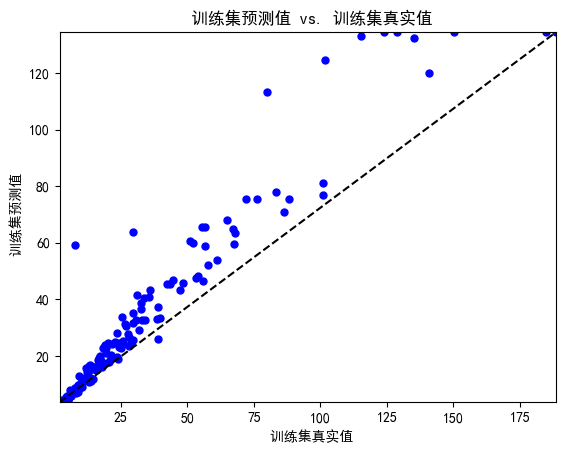

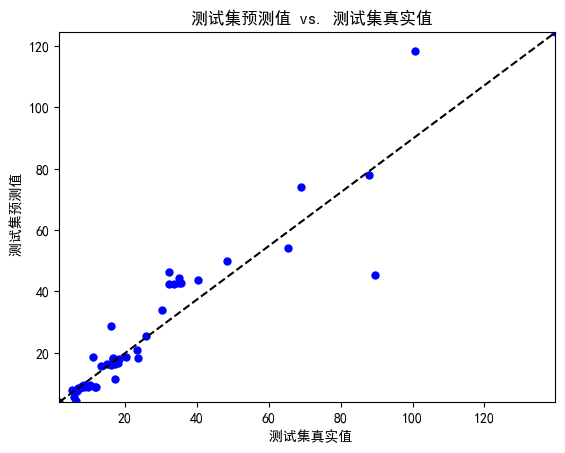

In [37]:
sz = 25
c ='b'

plt.figure()
plt.scatter(y_train, y_sim1, sz, c)
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_sim1), np.max(y_sim1)],'--k')
plt.xlabel(' 训练集真实值')
plt.ylabel(' 训练集预测值')
plt.xlim([np.min(y_train), np.max(y_train)])
plt.ylim([np.min(y_sim1), np.max(y_sim1)])
plt.title(' 训练集预测值 vs. 训练集真实值')

plt.figure()
plt.scatter(y_test, y_sim2, sz, c)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_sim2), np.max(y_sim2)],'--k')
plt.xlabel(' 测试集真实值')
plt.ylabel(' 测试集预测值')
plt.xlim([np.min(y_test), np.max(y_test)])
plt.ylim([np.min(y_sim2), np.max(y_sim2)])
plt.title(' 测试集预测值 vs. 测试集真实值')

plt.show()